<a href="https://colab.research.google.com/github/WengGeyu/NMA-DL/blob/main/data_to_nnUNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/ColabNotebooks')
# !git clone https://github.com/MIC-DKFZ/nnUNet.git
%cd nnUNet
!pip install -e .
# !pip install --upgrade git+https://github.com/FabianIsensee/hiddenlayer.git

In [ ]:
from batchgenerators.utilities.file_and_folder_operations import *
import shutil
import random
from nnunetv2.dataset_conversion.generate_dataset_json import generate_dataset_json
# from nnunetv2.paths import nnUNet_raw

def convert_aneurysm(base_dir: str, nnunet_dataset_id: int = 333):
    task_name = "aneurysm"

    foldername = "Dataset%03.0d_%s" % (nnunet_dataset_id, task_name)

    # setting up nnU-Net folders
    out_base = join('/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_raw', foldername)
    imagestr = join(out_base, "imagesTr")
    labelstr = join(out_base, "labelsTr")
    teststr = join(out_base, "imagesTs")
    tslbstr = join(out_base, "labelsTs")
    maybe_mkdir_p(imagestr)
    maybe_mkdir_p(labelstr)
    maybe_mkdir_p(teststr)
    maybe_mkdir_p(tslbstr)

    cases = subdirs(base_dir, prefix='sub-', join=False)

    num_folders = len(cases)
    num_train = int(num_folders * .8)
    num_test = num_folders - num_train

    # Randomly select folders for training and testing
    train_folders = random.sample(cases, num_train)
    test_folders = [folder for folder in cases if folder not in train_folders]

    for tr in train_folders:
        shutil.copy(join(base_dir, tr, 'angio.nii.gz'), join(imagestr, f'{tr}_0000.nii.gz'))
        shutil.copy(join(base_dir, tr, 'Lesion_1_mask.nii.gz'), join(labelstr, f'{tr}.nii.gz'))

    for ts in test_folders:
        shutil.copy(join(base_dir, ts, 'angio.nii.gz'), join(teststr, f'{ts}_0000.nii.gz'))
        shutil.copy(join(base_dir, ts, 'Lesion_1_mask.nii.gz'), join(tslbstr, f'{ts}.nii.gz'))

    generate_dataset_json(out_base, {0: "TOF"},
                          labels={
                              "background": 0,
                              "aneurysm": 1
                          },
                          num_training_cases=len(train_folders), file_ending='.nii.gz')

convert_aneurysm('/content/drive/MyDrive/ColabNotebooks/temp_data', 333)

In [ ]:
! nnUNet_raw="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_raw" \
nnUNet_preprocessed="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_preprocessed" \
nnUNet_results="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_results" \
nnUNetv2_plan_and_preprocess -d 333

Fingerprint extraction...
Dataset333_aneurysm
Experiment planning...
Attempting to find 3d_lowres config. 
Current spacing: [0.56650093 0.42246094 0.42246094]. 
Current patch size: [ 56 224 192]. 
Current median shape: [135.9223301  496.11650485 435.9223301 ]
Attempting to find 3d_lowres config. 
Current spacing: [0.58349596 0.43513477 0.43513477]. 
Current patch size: [ 56 224 192]. 
Current median shape: [131.96342728 481.66650957 423.2255632 ]
Attempting to find 3d_lowres config. 
Current spacing: [0.60100084 0.44818881 0.44818881]. 
Current patch size: [ 56 224 192]. 
Current median shape: [128.11983231 467.63738793 410.89860505]
Attempting to find 3d_lowres config. 
Current spacing: [0.61903087 0.46163447 0.46163447]. 
Current patch size: [ 56 224 192]. 
Current median shape: [124.38818671 454.01688148 398.93068451]
Attempting to find 3d_lowres config. 
Current spacing: [0.63760179 0.47548351 0.47548351]. 
Current patch size: [ 56 224 192]. 
Current median shape: [120.76522981 440

Training

In [ ]:
! nnUNet_raw="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_raw" \
nnUNet_preprocessed="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_preprocessed" \
nnUNet_results="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_results" \
nnUNetv2_train 333 2d all -tr nnUNetTrainer_10epochs --c

Traceback (most recent call last):
  File "/usr/local/bin/nnUNetv2_train", line 33, in <module>
    sys.exit(load_entry_point('nnunetv2', 'console_scripts', 'nnUNetv2_train')())
  File "/content/drive/MyDrive/ColabNotebooks/nnUNet/nnunetv2/run/run_training.py", line 253, in run_training_entry
    run_training(args.dataset_name_or_id, args.configuration, args.fold, args.tr, args.p, args.pretrained_weights,
  File "/content/drive/MyDrive/ColabNotebooks/nnUNet/nnunetv2/run/run_training.py", line 181, in run_training
    nnunet_trainer = get_trainer_from_args(dataset_name_or_id, configuration, fold, trainer_class_name,
  File "/content/drive/MyDrive/ColabNotebooks/nnUNet/nnunetv2/run/run_training.py", line 63, in get_trainer_from_args
    plans = load_json(plans_file)
  File "/usr/local/lib/python3.10/dist-packages/batchgenerators/utilities/file_and_folder_operations.py", line 68, in load_json
    with open(file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/content/

Predicting

In [2]:
! nnUNet_raw="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_raw" \
nnUNet_preprocessed="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_preprocessed" \
nnUNet_results="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_results" \
nnUNetv2_predict -i "/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_raw/Dataset666_aneurysm/imagesTr" -o "/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_results/Dataset666_aneurysm/nnUNetTrainer__nnUNetPlans__3d_lowres/predTr" -c 3d_lowres -d 666 -f 0 1 2 3 4 \
# -chk checkpoint_best.pth


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 5 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 5 cases that I would like to predict

Predicting sub_013:
perform_everything_on_gpu: True
100% 24/24 [00:31<00:00,  1.30s/it]
100% 24/24 [00:22<00:00,  1.07it/s]
100% 24/24 [00:23<00:00,  1.04it/s]
100% 24/24 [00:23<00:00,  1.01it/s]
100% 24/24 [00:25<00:00,  1.05s/it]
Prediction done, transferring to CPU if needed
sending off prediction to background worker for resampling and export
done with sub_013

Predicting sub_022:
perform_everything_on_gpu: True
100% 18/18 [00:19

In [3]:
! nnUNet_raw="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_raw" \
nnUNet_preprocessed="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_preprocessed" \
nnUNet_results="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_results" \
nnUNetv2_predict -i "/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_raw/Dataset666_aneurysm/imagesTr" -o "/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_results/Dataset666_aneurysm/nnUNetTrainer__nnUNetPlans__3d_cascade_fullres/fold_all/predTr" -d 666 -c 3d_cascade_fullres -device cuda -f all -prev_stage_predictions "/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_results/Dataset666_aneurysm/nnUNetTrainer__nnUNetPlans__3d_lowres/predTr"



#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 5 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 5 cases that I would like to predict

Predicting sub_013:
perform_everything_on_gpu: True
100% 96/96 [01:46<00:00,  1.11s/it]
Prediction done, transferring to CPU if needed
sending off prediction to background worker for resampling and export
done with sub_013

Predicting sub_022:
perform_everything_on_gpu: True
100% 64/64 [01:10<00:00,  1.10s/it]
Prediction done, transferring to CPU if needed
sending off prediction to background worker for resampling and export
done wit

Visualizing

In [3]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib.transforms as mtran

test_path = "/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_raw/Dataset666_aneurysm/imagesTr"
# pred_path = "/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_raw/Dataset666_aneurysm/labelsTr"
pred_path = "/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_results/Dataset666_aneurysm/nnUNetTrainer__nnUNetPlans__3d_cascade_fullres/fold_all/predTr"
test_filename = os.path.join(test_path,'sub_022_0000.nii.gz')
pred_filename = os.path.join(pred_path,'sub_022.nii.gz')
test_obj = nib.load(test_filename)
pred_obj = nib.load(pred_filename)
# Extract data as numpy ndarray
test_data = test_obj.get_fdata()
pred_data = pred_obj.get_fdata()
# Get the image shape
# height, width, depth = pred_data.shape
# print(f"The image object has the following dimensions: height: {height}, width:{width}, depth:{depth}")


Plotting Layer 94 of Image


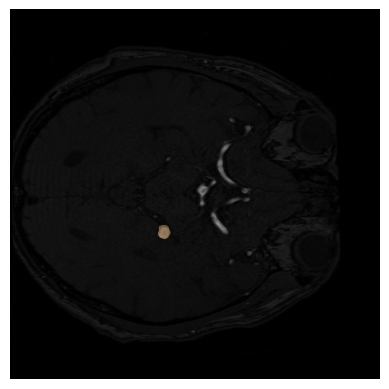

In [12]:
# Select random layer number
pred = np.asarray(np.nonzero(pred_data))
i = pred[2, np.random.randint(0, np.size(pred,1))]
# Define a channel to look at
print(f"Plotting Layer {i} of Image")
plt.imshow(test_data[:, :, i], cmap='gray')
plt.imshow(pred_data[:, :, i], cmap='copper', alpha=0.4)
plt.axis('off');

In [1]:
%run '/content/drive/MyDrive/ColabNotebooks/nnUNet/nnunetv2/evaluation/evaluate_predictions.py'